In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [39]:
df1 = pd.read_csv("mental.csv")
df22 = pd.read_csv("data/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
df3 = pd.read_csv("data/6- depressive-symptoms-across-us-population.csv")
df44 = pd.read_csv("data/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

# Describe Function for All 4 datasets

In [40]:
def describe(df):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [41]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [42]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df2 : Adult population, mental illnesses"' + color.END)
print(describe(df2))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df3 : Depressive"' + color.END)
print(describe(df3))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df4 : Number of countries"' + color.END)
print(describe(df4))

"The describe table of df1 : Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  


"The describe table of df2 : Adult population, ment

# Visualizations

In [43]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

<Figure size 1200x800 with 0 Axes>

1. *North America* exhibits the highest prevalence of major depression and a high incidence of bipolar disorder.
2. *Australasia* ranks high for depression with comparatively lower bipolar disorder rates.
3. *Central Asia* and *Andean Latin America* have the lowest reported rates of both conditions.
4. *The Asia Pacific* has a high bipolar disorder rate but lower depression prevalence compared to *North America*.
5. *The Caribbean and East Asia* show moderate depression levels with relatively low bipolar disorder rates.

In [44]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

<Figure size 1200x800 with 0 Axes>

1. *North America* tops the chart for both eating disorders and dysthymia.
2. Eating disorders are also significant in Central Latin America, Western Europe, and Asia Pacific, with comparatively lower dysthymia rates.
3. The Caribbean, Southeast Asia, and Andean Latin America report the lowest for both conditions.
4. A general correlation exists between eating disorders and dysthymia prevalence, with some regional exceptions.
5. Australasia and East Asia show moderate figures for both health issues.

In [45]:
df2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)


In [46]:
df2['Schizophrenia'] = df2['Schizophrenia'].astype(float)


In [47]:
df2.sort_values(by= "Schizophrenia" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show()

<Figure size 1200x800 with 0 Axes>

1. North America shows the highest rates of anxiety and significant schizophrenia.
2. Australasia and Asia Pacific report moderate schizophrenia but elevated anxiety.
3. The lowest incidences of both conditions are in Central Asia and Andean Latin America.
4. Higher anxiety often aligns with higher schizophrenia rates, with some exceptions.
5. The Caribbean and East Asia present moderate schizophrenia with diverse anxiety levels.

In [48]:

fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = ["Andean Latin America", "West Sub-Saharan Africa", "Tropical Latin America", "Central Asia", "Central Europe",
    "Central Sub-Saharan Africa", "Southern Latin America", "North Africa/Middle East", "Southern Sub-Saharan Africa",
    "Southeast Asia", "Oceania", "Central Latin America", "Eastern Europe", "South Asia", "East Sub-Saharan Africa",
    "Western Europe", "World", "East Asia", "Caribbean", "Asia Pacific", "Australasia", "North America"]

fig.append_trace(go.Bar(
    x=df2["Bipolar disorder"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Bipolar disorder in Mental Health',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=df2["Major depression"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Major depression in Mental Health',
), 1, 2)

fig.update_layout(
    title='Major depression and Bipolar disorder',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(df2["Major depression"], df2["Bipolar disorder"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

1. North America exhibits the highest bipolar disorder prevalence.
2. Australasia leads in major depression rates.
3. The Caribbean and Central Asia have the lowest bipolar disorder rates.
4. Significant variation exists in the regional prevalence of both conditions.

# Multiple Analysis

In [49]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

The line chart depicts the frequency of depressive symptoms experienced by the U.S. population:
1. "Psychomotor agitation" is the symptom reported most frequently for "more than half the days" and "several days."
2. "Low self-esteem" occurs most frequently "nearly every day."
3. "Appetite change" and "Low energy" are the least frequently reported symptoms across all frequency categories.
4. There is a marked peak in "Difficulty concentrating" and "Sleep problems" for "several days."
5. Symptoms like "Depressed mood" and "Loss of interest" show moderate frequency across all categories.

In [50]:
x = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
     "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
     "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia","Major depressive disorder",
    "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df4["Number of countries with primary data on prevalence of mental disorders"],
                         name='Nearly every day',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='mental illnesses in the global burden of disease study',
                   xaxis_title='illnesses',
                   yaxis_title='Number of countries')


fig.show()

The line chart depicts the number of countries reporting various mental illnesses in a global disease study:

1. Anxiety disorders are reported in the highest number of countries.
2. Attention-deficit/hyperactivity disorder (ADHD) and major depressive disorder are also commonly reported across many countries.
3. Disorders related to substance use, including alcohol and cocaine, are noted in a moderate number of countries.
4. Conditions like autism spectrum disorder, bulimia nervosa, and opioid use disorders are reported in fewer countries.
5. Personality disorders are among the least reported in this study.

In [51]:
#Renaming Columns for better plots

In [52]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [53]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [54]:
df1


,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [55]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [56]:
df1_variables


,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


# Correlation

In [57]:
Corrmat = df1_variables.corr()


<AxesSubplot:>

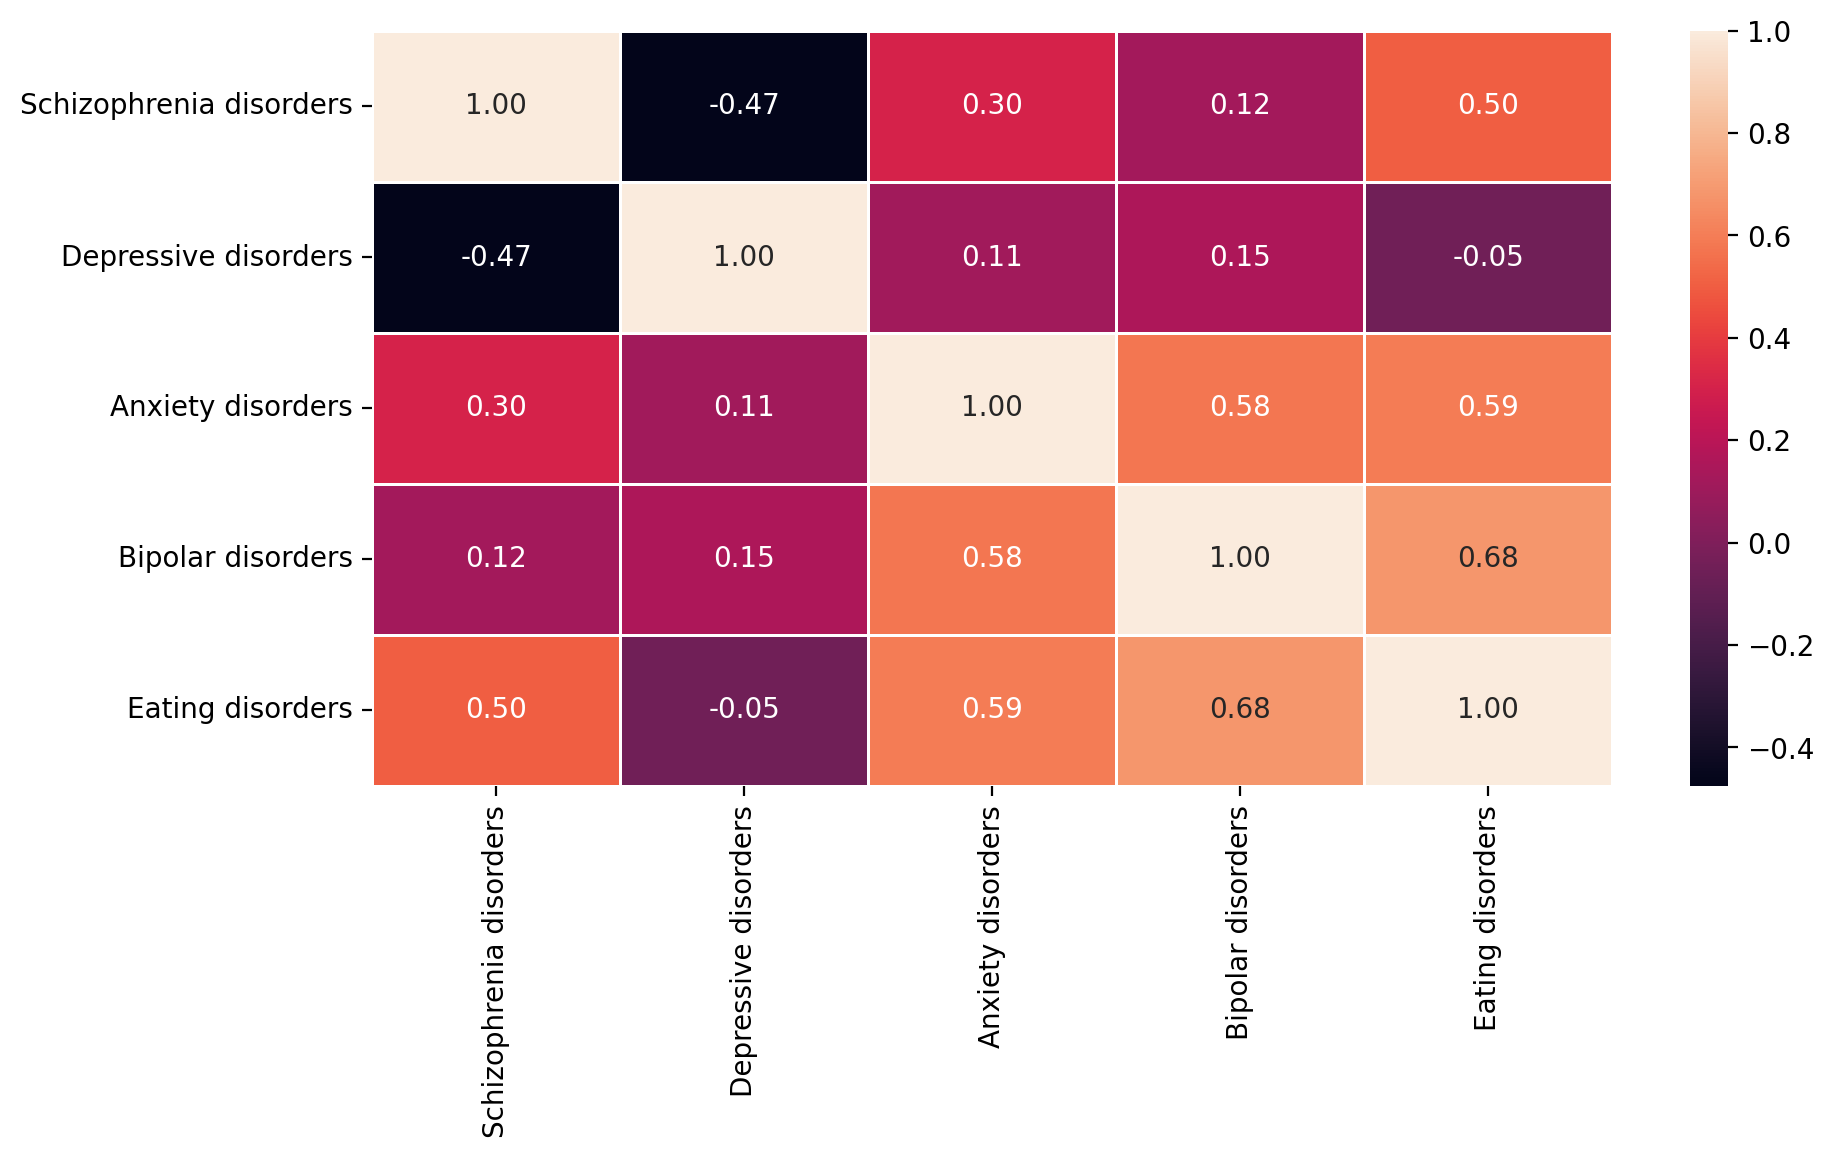

In [58]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

The heatmap visualizes correlation coefficients between different mental health disorders:

1. A strong positive correlation exists between bipolar and eating disorders (0.68).
2. Anxiety disorders show moderate positive correlations with both bipolar (0.58) and eating disorders (0.59).
3. Schizophrenia disorders have a moderate negative correlation with depressive disorders (-0.47).
4. There's a moderate positive correlation between schizophrenia and eating disorders (0.50).
5. Other correlations between disorders range from weak to moderate, with no values suggesting a very strong direct correlation or inverse relationship apart from those mentioned.

# Scater Plots wrt Eating Disorders

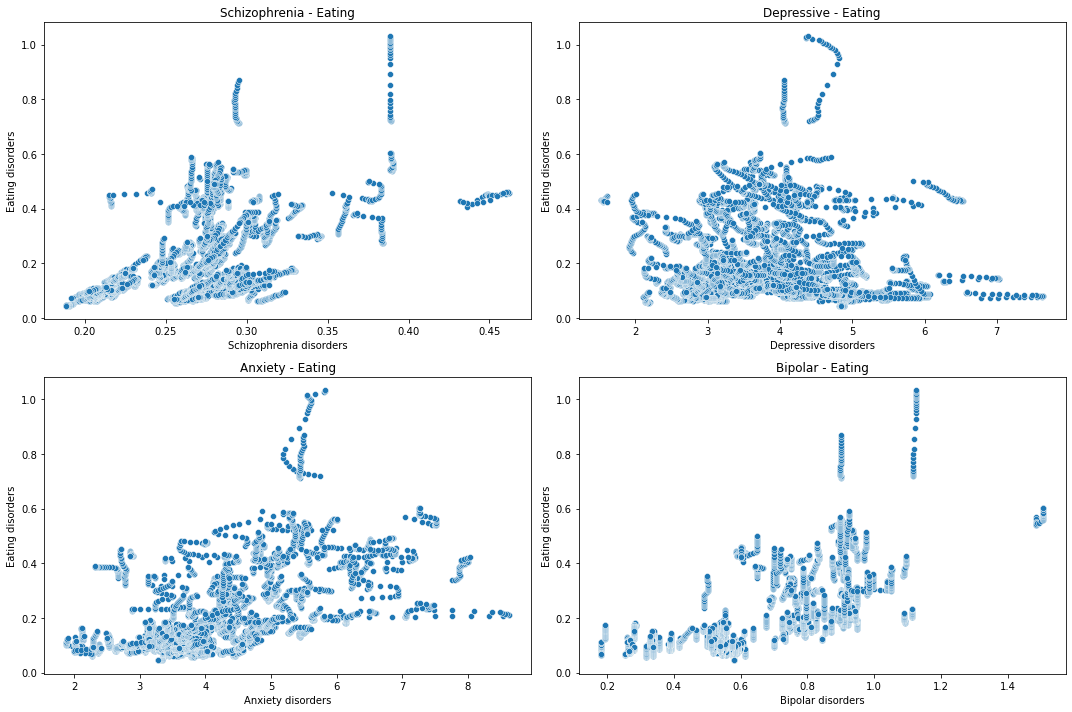

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize= (15,10))

ax1.set_title('Schizophrenia - Eating')
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=df1_variables, ax=ax1)

ax2.set_title('Depressive - Eating')
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=df1_variables, ax=ax2)

ax3.set_title('Anxiety - Eating')
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=df1_variables, ax=ax3)

ax4.set_title('Bipolar - Eating')
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=df1_variables, ax=ax4)

plt.tight_layout()

The scatter plots illustrate the relationships between different pairs of mental health disorders:

1. **Schizophrenia - Eating**: Data is widely dispersed, indicating a varied but positive relationship.
2. **Depressive - Eating**: A dense clustering with a slight upward trend suggests a positive correlation.
3. **Anxiety - Eating**: The plot shows a broad dispersion with many outliers, suggesting a complex relationship.
4. **Bipolar - Eating**: Points are spread but with a discernible positive trend, indicating a correlation between the two.

# BOXPLOT(Outlier Detection)

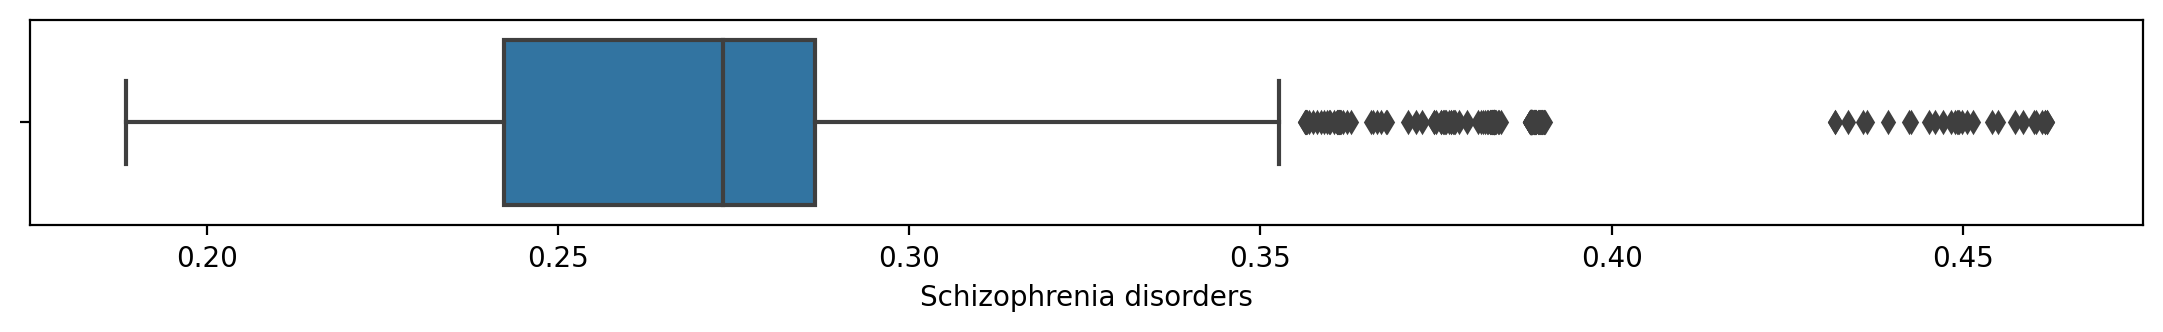

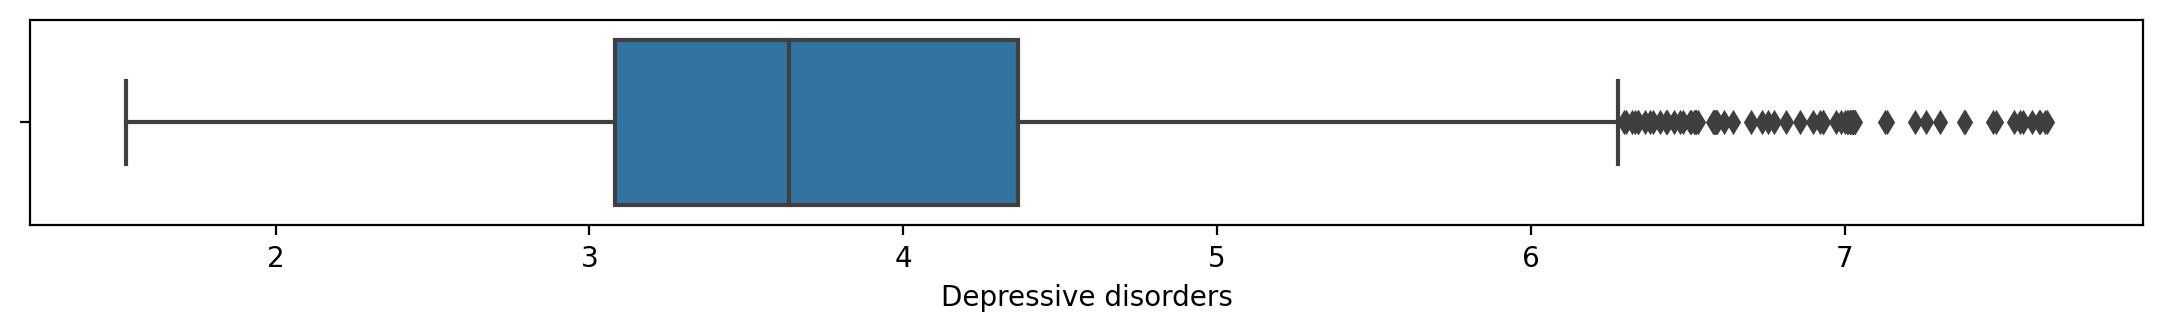

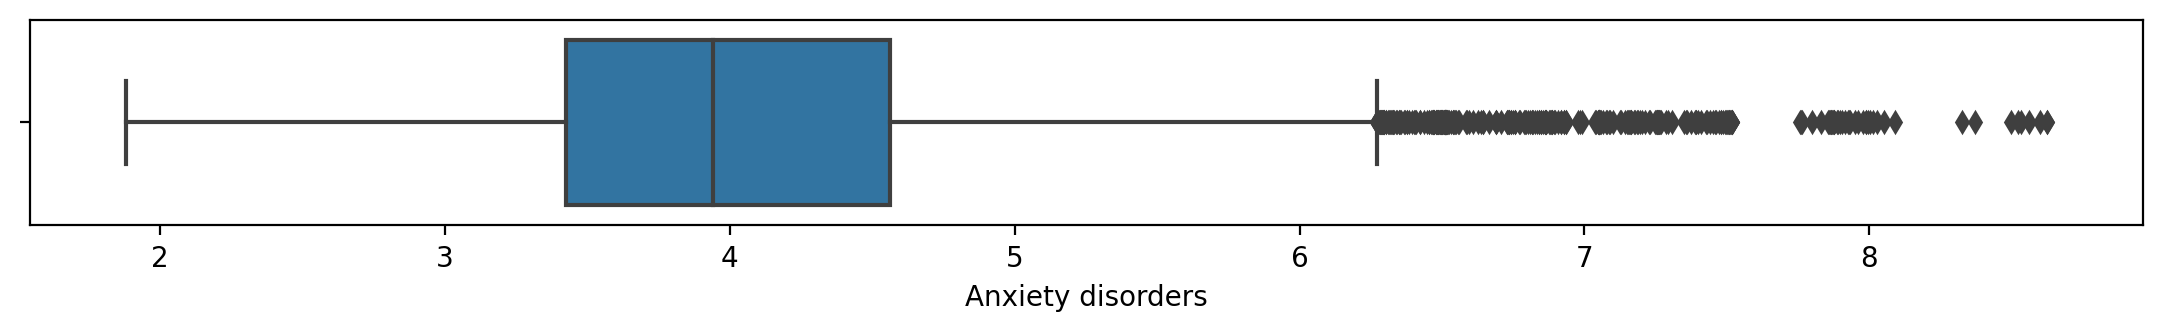

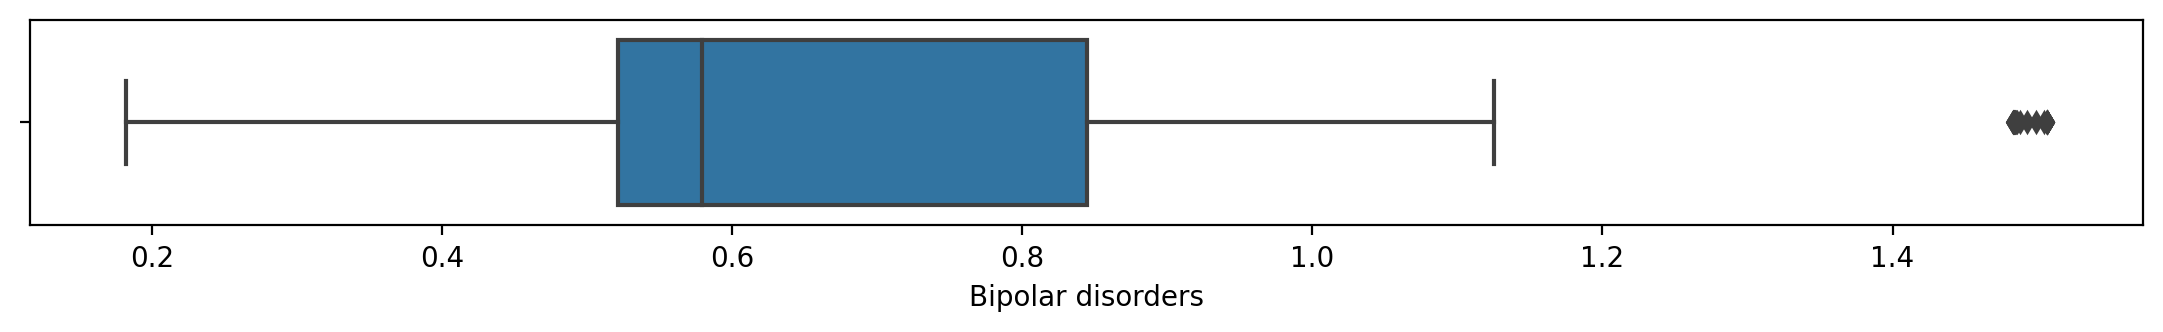

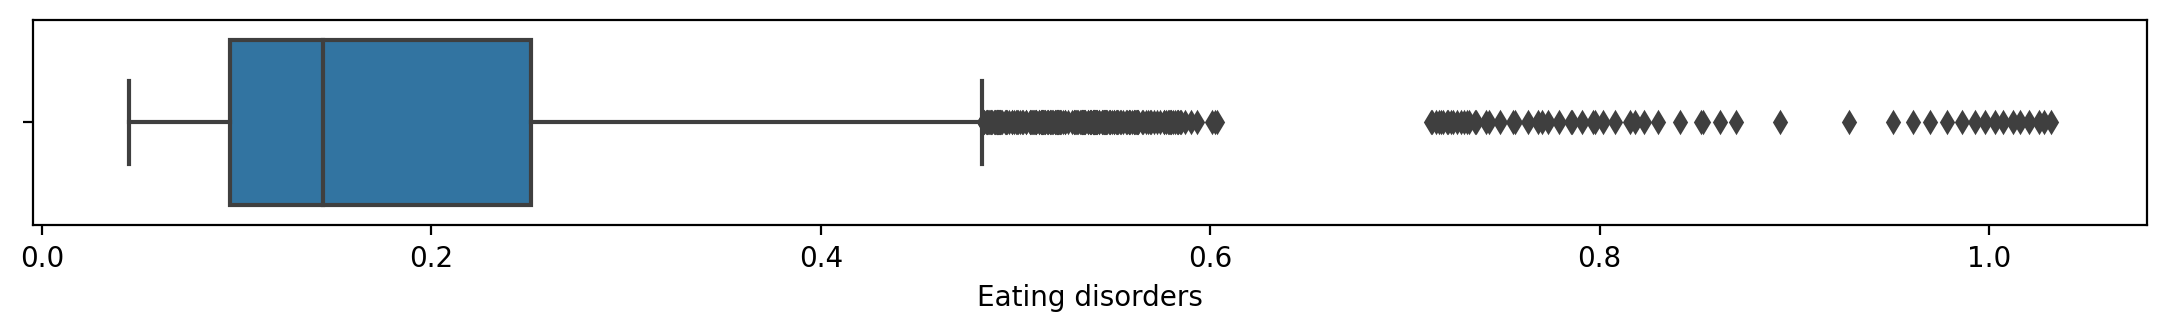

In [60]:
Numerical = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders','Eating disorders']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df1_variables)
    i += 1
    plt.show()

The series of box plots display the distribution of scores or values associated with different mental health disorders:

1. **Schizophrenia Disorders**: Scores are concentrated in a narrow range with several outliers indicating sporadic higher values.
2. **Depressive Disorders**: This distribution shows a wider range with outliers on the higher end, indicating occasional higher scores.
3. **Anxiety Disorders**: Similar to depressive disorders, anxiety shows a range of values with a few high outliers.
4. **Bipolar Disorders**: There's a broad spread of values, suggesting varying degrees of this condition across observations, with outliers on both the lower and higher ends.
5. **Eating Disorders**: Scores are mostly lower with some spread, but there are outliers indicating instances of higher values.

The box plots collectively suggest variability across different types of mental health disorders, with each having its unique distribution and outliers pattern.